In [68]:
# Imports
import requests
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Data extraction

In [32]:
# Getting the data
dataset_path = '../datasets/'
filename = 'archive.zip'

with zipfile.ZipFile(f'{dataset_path}{filename}') as zip_ref:
    zip_ref.extractall(f'{dataset_path}')

In [33]:
# Read to dataframes
df = pd.read_csv(f'{dataset_path}/loan_data.csv', sep=',')

### Exploratory data analysis (EDA)

In [34]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [35]:
# Check columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [36]:
# Check summary statistical measures 
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [37]:
# Check missing values
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [38]:
# Normalize columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [39]:
# Check column values
for column in df.columns:
    print(f"{column} - {df[column].nunique()}")
    print(df[column].unique())

    print()

person_age - 60
[ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.  34.  29.  33.  28.
  35.  31.  27.  30.  36.  40.  50.  45.  37.  39.  44.  43.  41.  46.
  38.  47.  42.  48.  49.  58.  65.  51.  53.  66.  61.  54.  57.  59.
  62.  60.  55.  52.  64.  70.  78.  69.  56.  73.  63.  94.  80.  84.
  76.  67. 116. 109.]

person_gender - 2
['female' 'male']

person_education - 5
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_income - 33989
[71948. 12282. 12438. ... 31924. 56942. 33164.]

person_emp_exp - 63
[  0   3   1   5   4   2   7   6 125   8 121 101 100  12  10   9  14  13
  11  15  16  17  19  28  25  18  24  22  20  23  21  31  26  27  29  32
  30 124  40  43  33  44  34  42  37  45  36  41  47  38  39  35  57  46
  49  48  50  76  62  61  58  93  85]

person_home_ownership - 4
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_amnt - 4483
[35000.  1000.  5500. ... 12229.  2771.  6665.]

loan_intent - 6
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DE

In [40]:
def range_credit_score(credit_score):
    if (300 <= credit_score) & (credit_score <= 579):
        return 'Poor'
    elif (580 <= credit_score) & (credit_score <= 669):
        return 'Fair'
    elif (670 <= credit_score) & (credit_score <= 739):
        return 'Good'
    elif (740 <= credit_score) & (credit_score <= 799):
        return 'Very Good'
    elif (800 <= credit_score) & (credit_score <= 850):
        return 'Excellent'
    else:
        return 'Unknown'

In [41]:
df['credit_score_label'] = df['credit_score'].apply(range_credit_score)

In [42]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,credit_score_label
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,Poor
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,Poor
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,Fair
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,Good
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,Fair
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,Fair
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,Fair
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,Fair


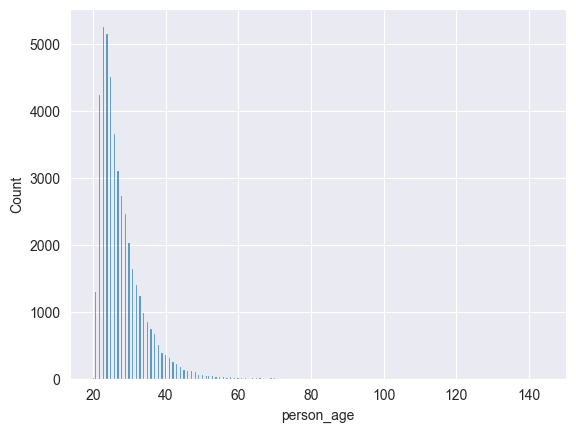

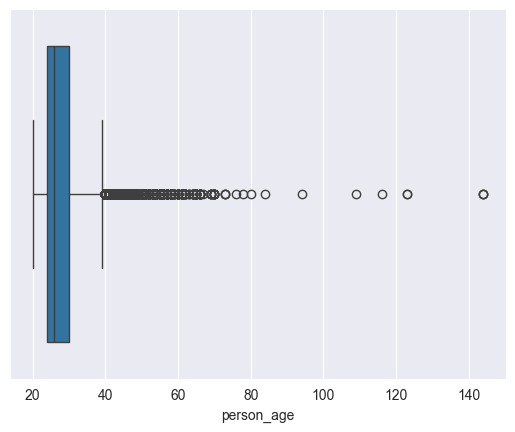

In [43]:
# Histogram of a single variable
sns.histplot(df['person_age'])
plt.show()

# Boxplot for detecting outliers
sns.boxplot(x=df['person_age'])
plt.show()

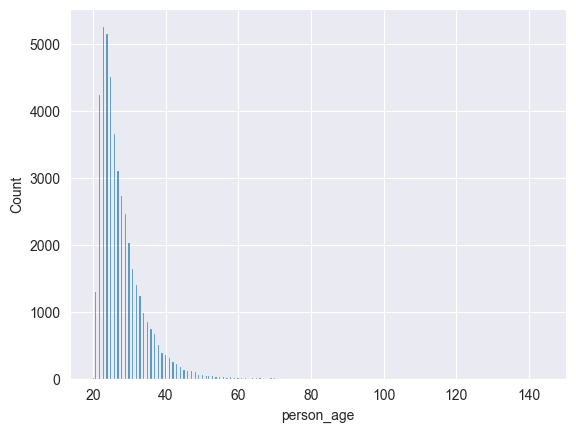

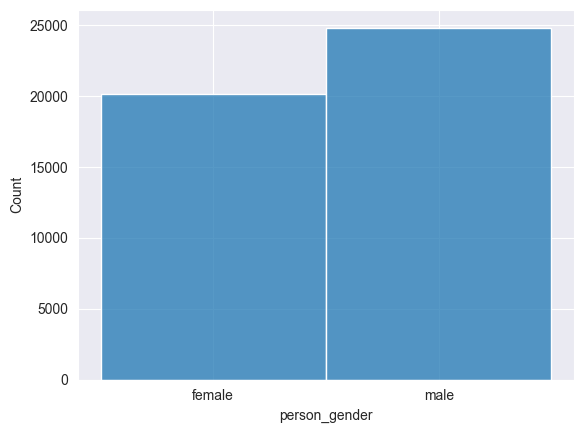

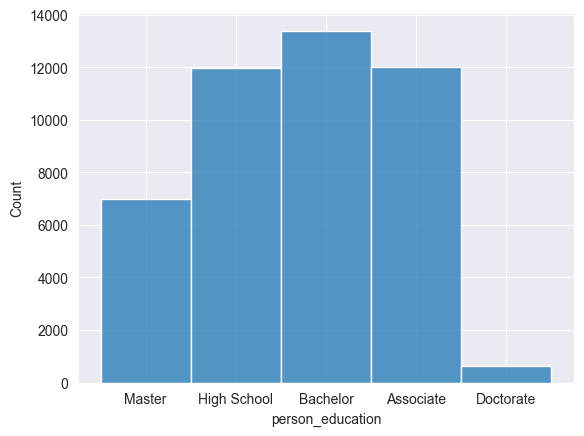

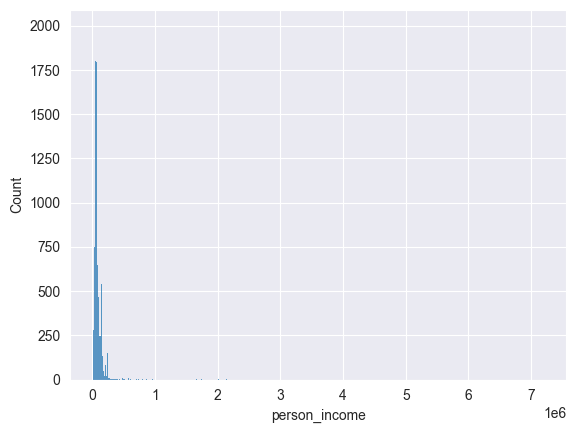

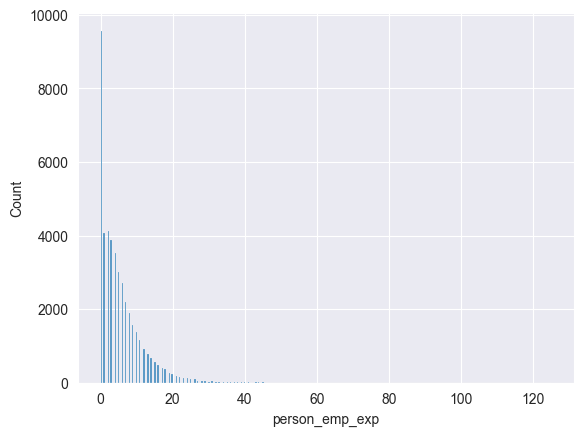

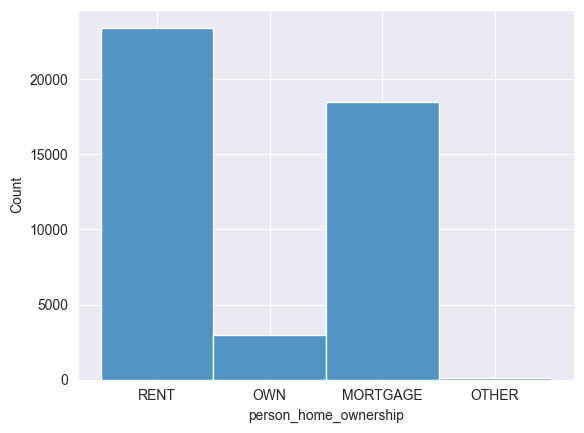

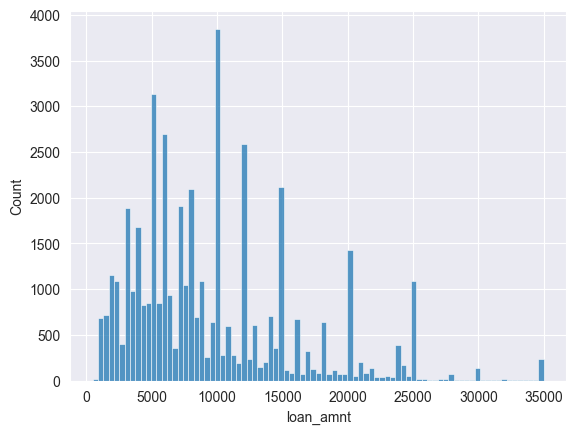

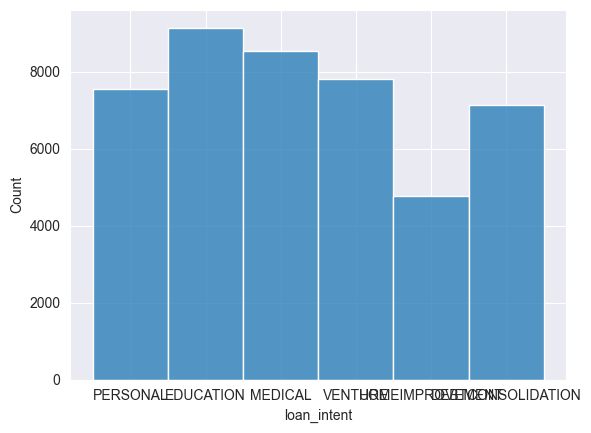

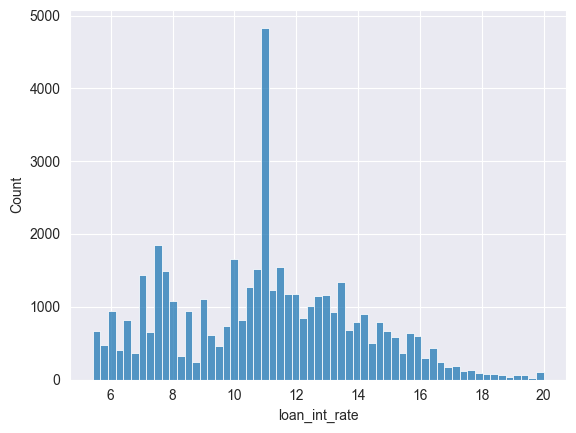

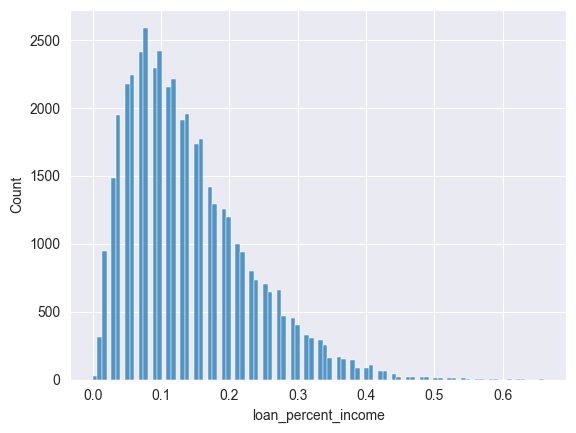

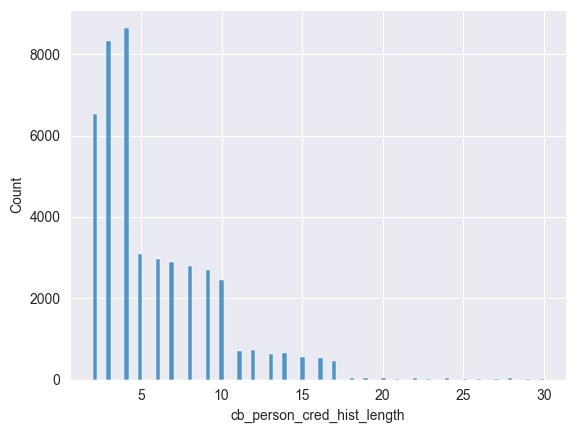

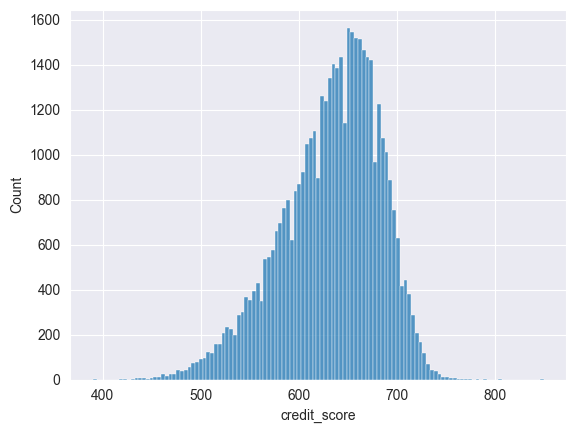

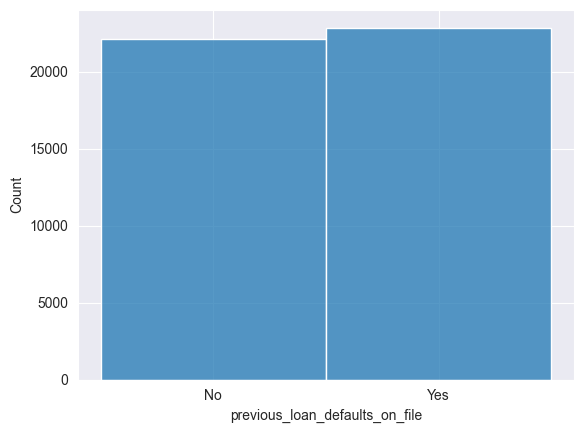

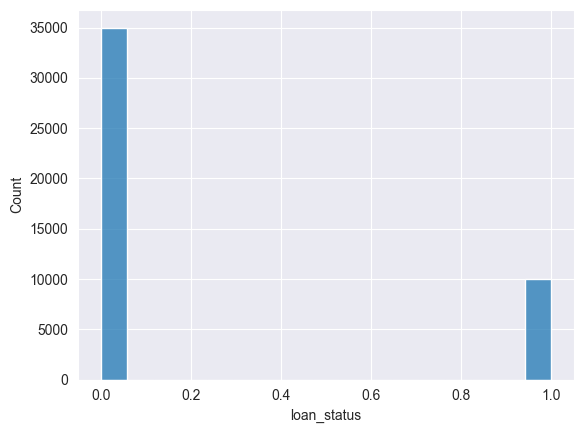

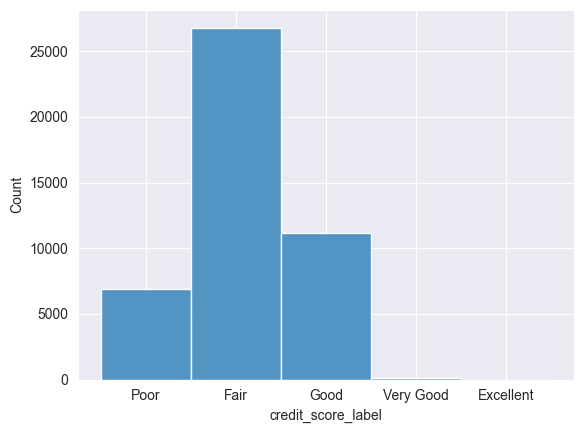

In [44]:
for column in df.columns:
    sns.histplot(df[column])
    plt.show()

### Train models 

In [46]:
# Prepare datasets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_full_train), len(df_train), len(df_val), len(df_test)

(36000, 27000, 9000, 9000)

In [47]:
# Drop indexes
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

# Assign 'loan_status' variables for prediction and exclude them from datasets
y_full_train = df_full_train.loan_status.values
y_test = df_test.loan_status.values

y_train = df_train.loan_status.values
y_val = df_val.loan_status.values

del df_full_train['loan_status']
del df_test['loan_status']

del df_train['loan_status']
del df_val['loan_status']

In [48]:
df_full_train.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
credit_score_label                 object
dtype: object

In [49]:
def get_features(dataframe):
    num = dataframe.select_dtypes(include=['number'], exclude='object').columns.values
    cat = dataframe.select_dtypes(include=['object']).columns.values
    num = list(num)
    cat = list(cat)
    return num, cat

In [50]:
#Train models
def train_train_logistic_regression_model(dataframe, features, target, C=1.0):
    dv = DictVectorizer(sparse=False)
    dicts = dataframe[features].to_dict(orient='records')
    X_train = dv.fit_transform(dicts)
    model_lr = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model_lr.fit(X_train, target)
    return dv, model_lr

In [51]:
# Predict models
def predict_logistic_regression_model(dataframe, features, dict_vectorizer, model):
    dicts = dataframe[features].to_dict(orient='records')
    X = dict_vectorizer.transform(dicts)
    var = model.predict_proba(X)
    return var

In [52]:
# Get numerical and categorical features
numerical, categorical = get_features(df_full_train)
print(numerical)
print(categorical)

['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'credit_score_label']


In [53]:
all_features = categorical + numerical

In [54]:
# Train Logistic Regression model
dv, model = train_train_logistic_regression_model(df_train, all_features, y_train, C=1.0)

In [81]:
# Calculate prediction
prediction = predict_logistic_regression_model(df_train, all_features, dv, model)
prediction

array([[0.81790912, 0.18209088],
       [0.9550646 , 0.0449354 ],
       [0.97329934, 0.02670066],
       ...,
       [0.23047168, 0.76952832],
       [0.68753374, 0.31246626],
       [0.45292977, 0.54707023]])

In [82]:
y_pred = prediction[:, 1]
decision = (y_pred >= 0.75)
(y_train == decision).mean()

np.float64(0.7983703703703704)

### Test service

In [83]:
examples = df_test[all_features].to_dict(orient='records')
examples = examples[0:10]

In [84]:
url = 'http://127.0.0.1:8024/predict'
loan_application = {
    'person_gender': 'male',
    'person_education': 'Associate',
    'person_home_ownership': 'OWN',
    'loan_intent': 'EDUCATION',
    'previous_loan_defaults_on_file': 'Yes',
    'credit_score_label': 'Good',
    'person_age': 33.0,
    'person_income': 100064.0,
    'person_emp_exp': 15,
    'loan_amnt': 14400.0,
    'loan_int_rate': 16.0,
    'loan_percent_income': 0.14,
    'cb_person_cred_hist_length': 7.0,
    'credit_score': 696
}

In [85]:
response = requests.post(url, json=loan_application).json()
response

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8024): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x118496f00>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [0]:
for example in examples:
    response = requests.post(url, json=example).json()
    print(response)